# Adult income dataset:

# Inroduction:

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

Fields: The dataset contains 16 columns Target filed: Income -- The income is divide into two classes: <=50K and >50K
Number of attributes: 14 -- These are the demographics and other features to describe a person

# Importing required Liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [2]:
adult=pd.read_csv('C:\\Users\\Naveen\\Downloads\\adult dataset.csv')
adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Head function is used to display the top five columns of the data

# Understanding the Dataset

In [3]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


To Find which kind of data type like int,float,object etc

# checking the shape of the data

In [4]:
adult.shape

(32561, 15)

shape is used to find the number of observations i.e, Number of Rows and columns

# Finding the Duplicate Values:

In [5]:
adult.duplicated().sum()

24

Duplicated values are nothing but REPEATED VALUES IN YOUR DATA, we can't remove the duplicate values from the data because some individuals have the same features 

# Finding the Null values:

In [6]:
adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

# Dealing with null values

Here the dataset is not using the default nan string for missing values, instead "?" is used

Hence we check occurrences of "?" in each column

# Cleaning Data

In [7]:
adult.replace('?', np.nan, inplace=True)

so we replaced the '?' with nan values

# Checking the nan values

In [8]:
adult.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

# Filling of Null values:

In [9]:
ad=adult.fillna(method="bfill")

Null values are in the form of Categorical format so we used backwardfill method

# Checking Null values Wheather filled or not

In [10]:
ad.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

# plot of percentage of Male and Female

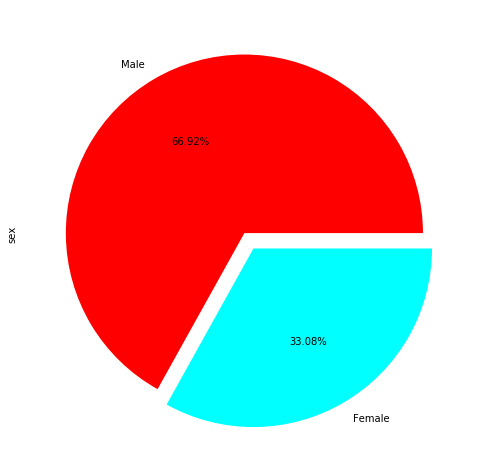

In [11]:
explode=[0,0.1]
plt.figure(figsize=(8,10))
adult['sex'].value_counts().plot(kind='pie',autopct='%.2f%%',explode=explode,colors = ['#FF0000','#00FFFF'])
plt.show()

Male percentage is high when compared to famale

# plot of Income and SEX

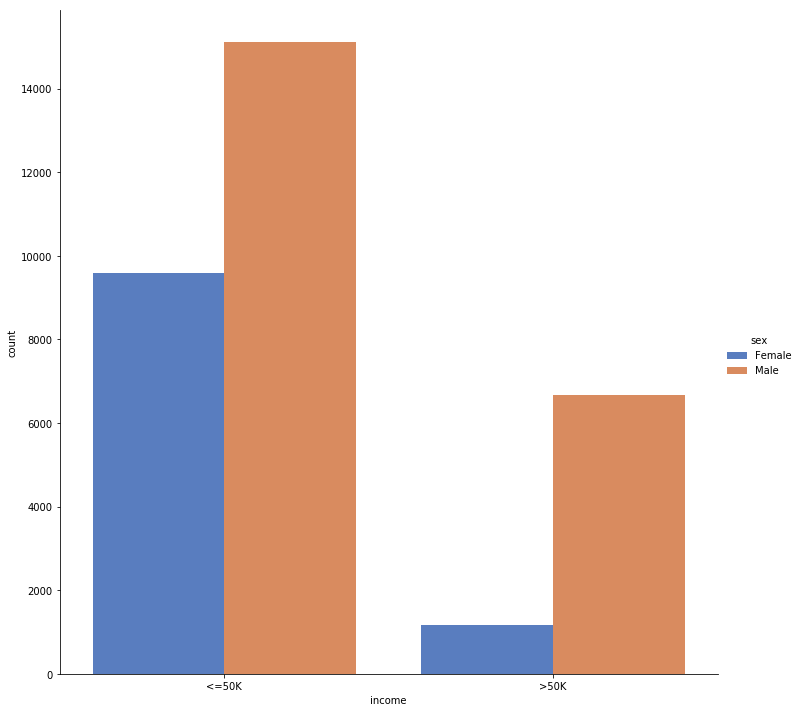

<Figure size 864x576 with 0 Axes>

In [12]:
import seaborn as sns
sns.catplot(x='income',hue='sex',data=adult,kind='count',height=10,palette='muted')
plt.figure(figsize=(12,8))

plt.show()


Male are earning more in both the cases

# Plot of age:

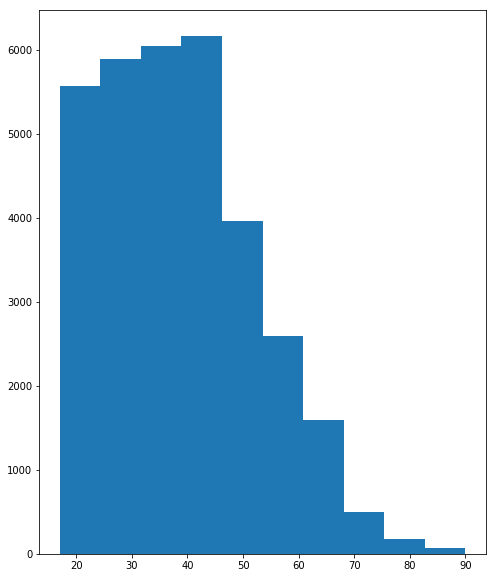

In [13]:
plt.figure(figsize=(8,10))
plt.hist(ad['age']);

In [14]:
ad['income'].unique()

array(['<=50K', '>50K'], dtype=object)

income is in object format so, we are converting into numerical format 

# converting income as 0 (<=50) and 1 (>50) by using map function

In [15]:
ad['income'] = adult['income'].map({'<=50K':0,'>50K':1})

# plot of income vs marital status

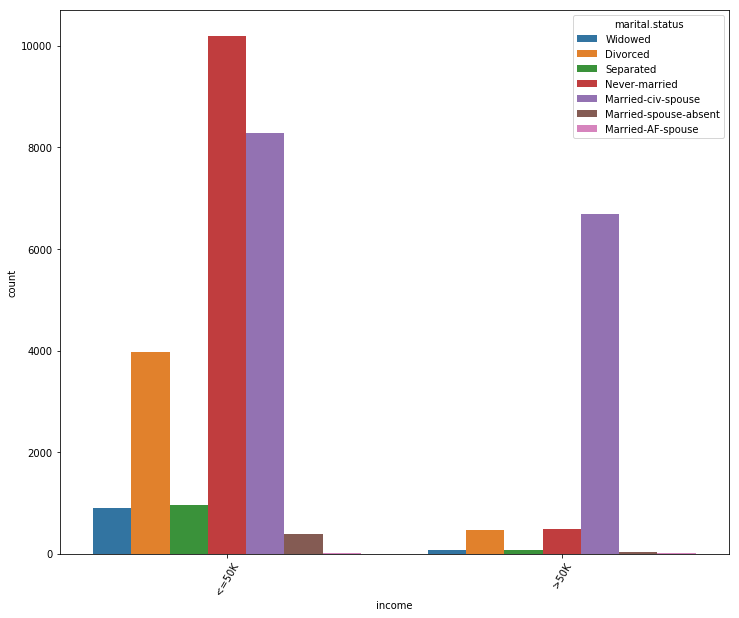

In [16]:
plt.figure(figsize=(12,10))
sns.countplot(x='income',hue='marital.status',data=adult)
plt.xticks(rotation=60)
plt.show()

NEVER MARRIED ARE ARE LESS THAN 50K AND MARRIED-AF-SPOUSE ARE EARNING MORE THAN 50K



# Relationship counts:

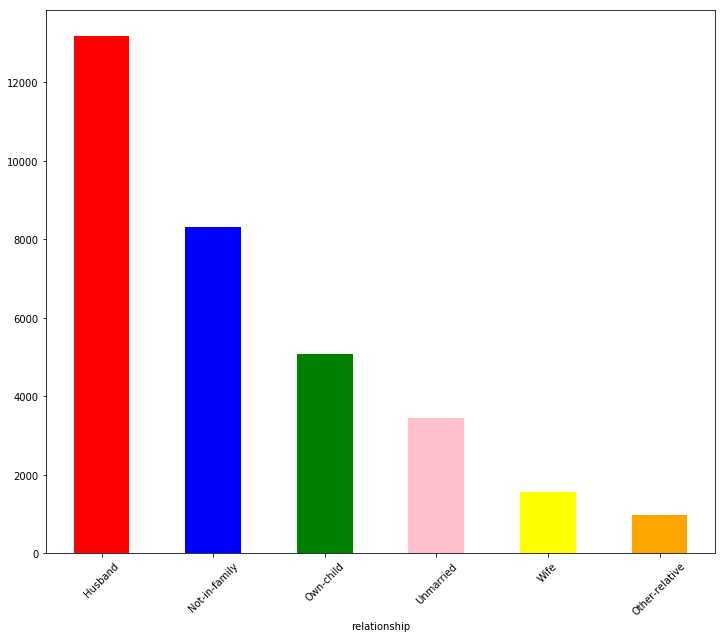

In [17]:
plt.figure(figsize=(12,10))
adult['relationship'].value_counts().plot(kind='bar',color=['red','blue','green','pink','yellow','orange'])
plt.xticks(rotation=45)
plt.xlabel("relationship")
plt.show()

RELATIONSHIP WITH HUSBAND HAS MORE POPULATION AND RELATIONSHIP WITH OTHER-RELATIVE HAS LESS POPULATION

# WORKCLASS VS INCOME

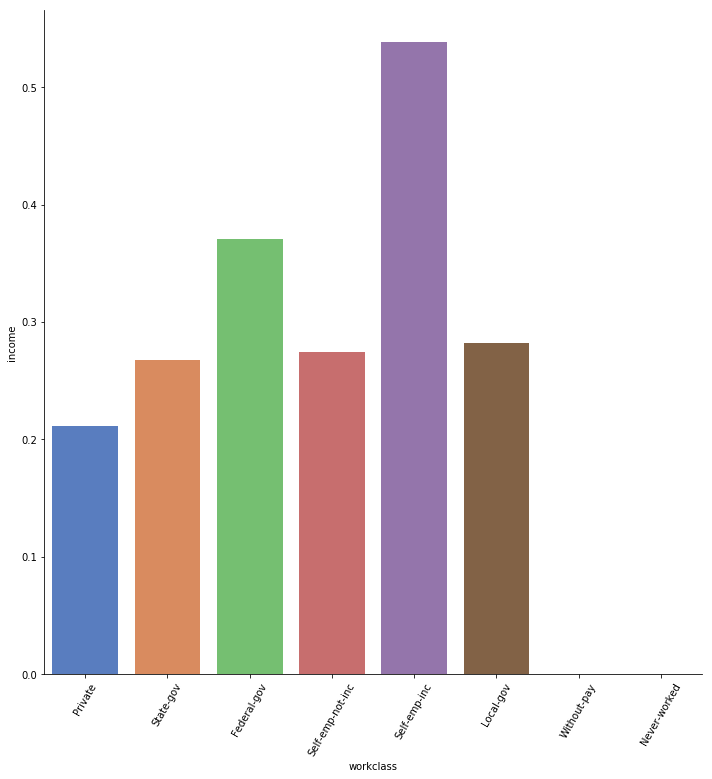

In [18]:
sns.catplot(x="workclass", y="income", data=ad, kind="bar",height=10, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()


SELF-EMP-INC ARE EARNING MORE WHEN COMPARED TO PRIVATE EMPLOYES

# plot of education vs income

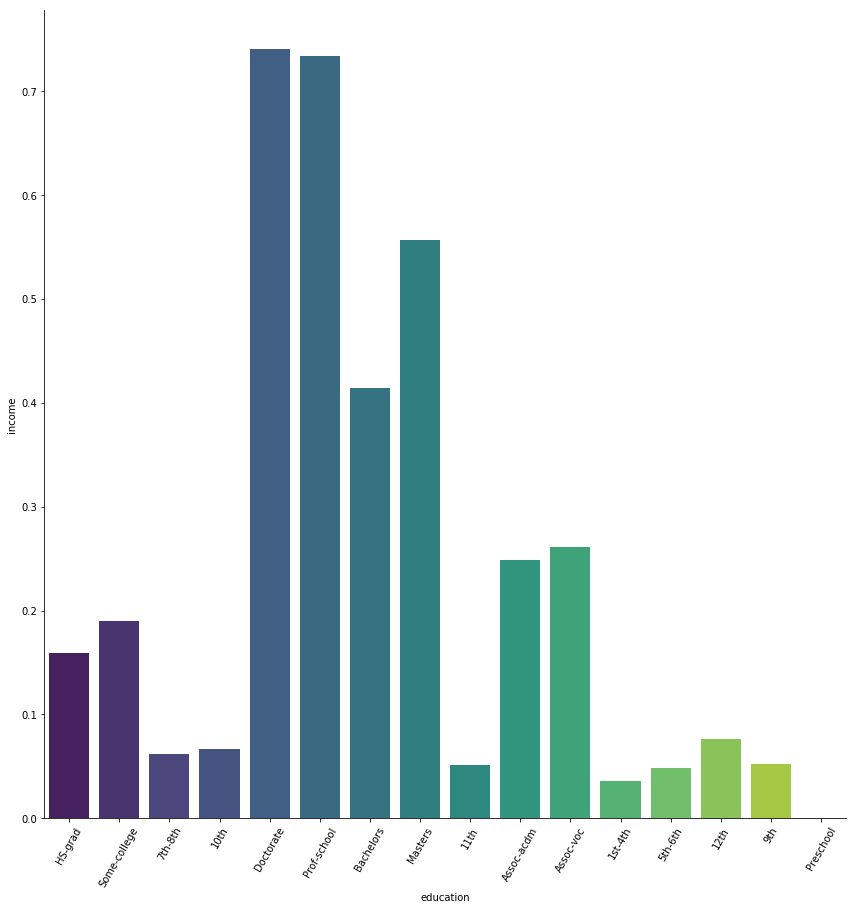

In [19]:
sns.catplot(x="education",y="income",data=ad,kind="bar", height = 12, palette = "viridis",ci=None)
plt.xticks(rotation=60);

Doctorate and prof-school are earning more income(>50)

# EDUCATION.NUM VS INCOME:

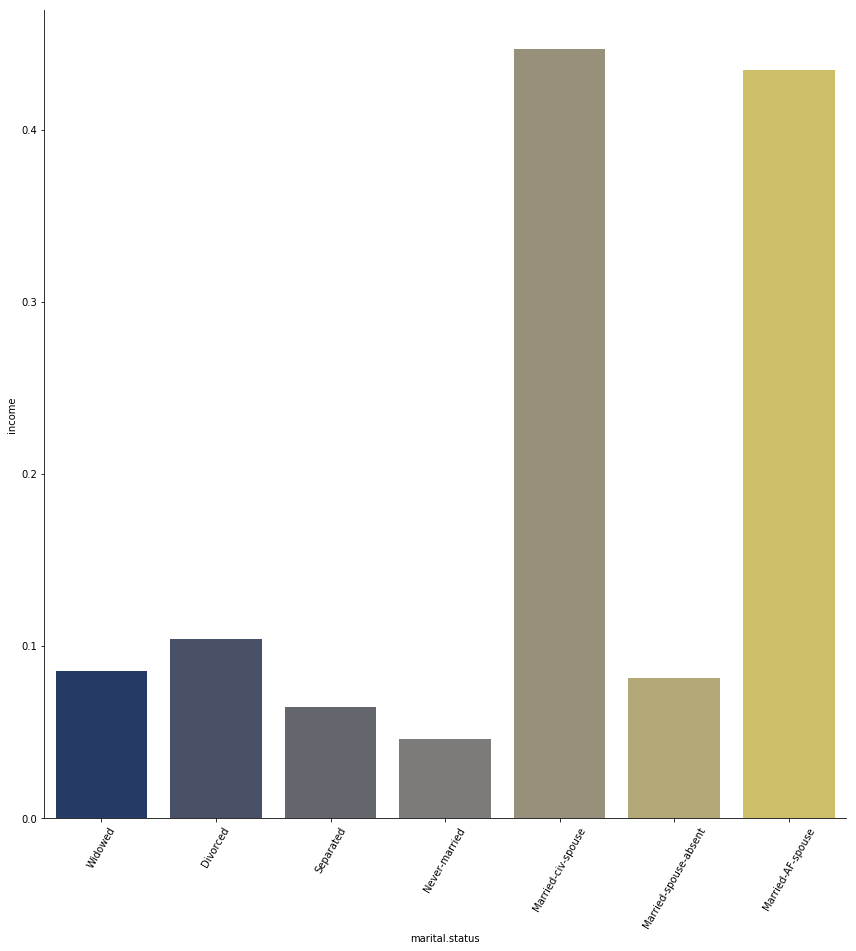

In [20]:
sns.catplot(x="marital.status",y="income",data=ad,kind="bar", height = 12, palette = "cividis",ci=None)
plt.xticks(rotation=60);

eduction.num 16 has more income (>50)

# MARITAL STATUS VS INCOME

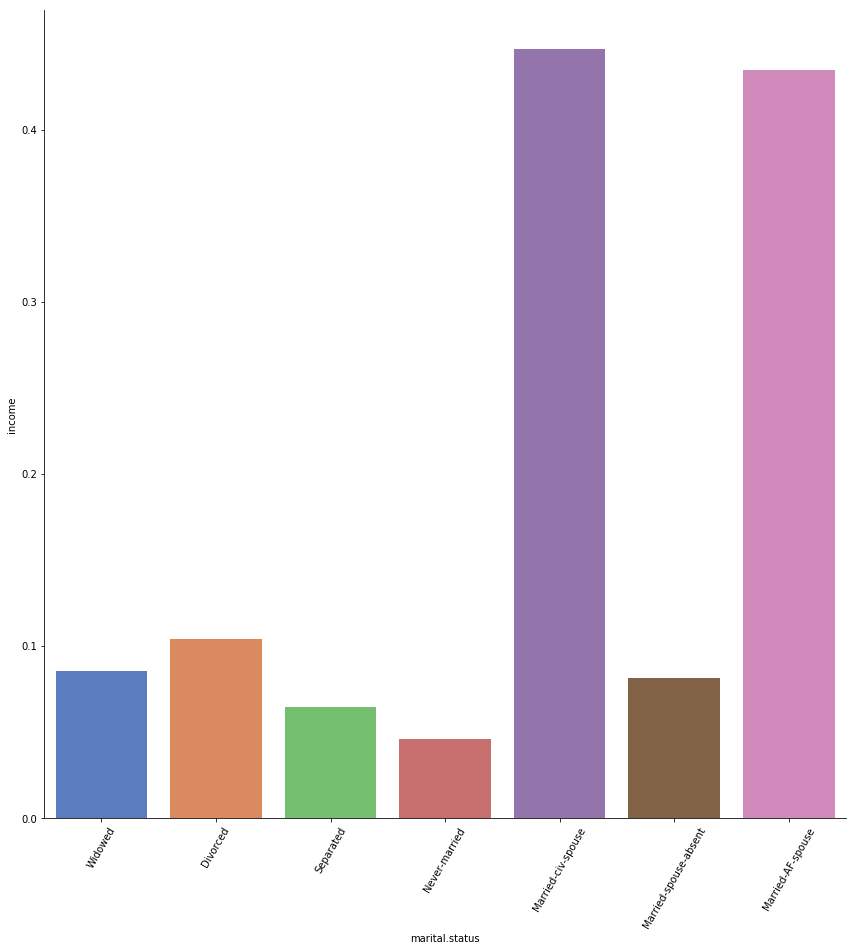

In [21]:
sns.catplot(x="marital.status",y="income",data=ad,kind="bar", height = 12, palette = "muted",ci=None)
plt.xticks(rotation=60);

married civ spouse is having more income

# OCCUPATION VS INCOME:

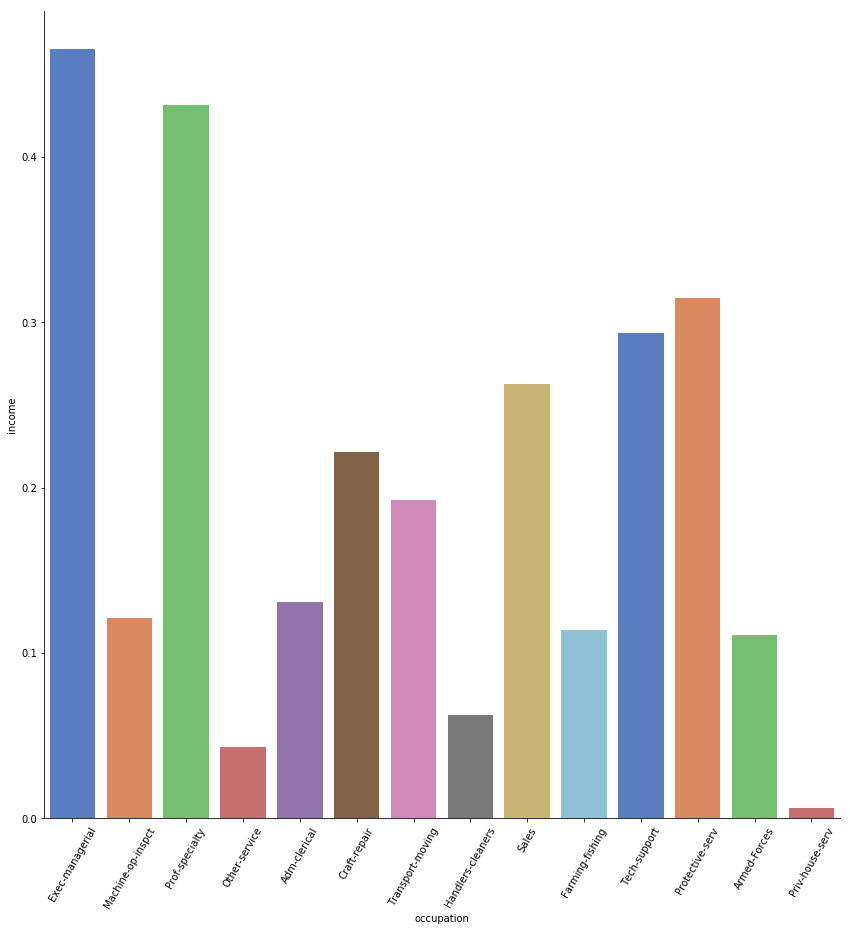

In [22]:
sns.catplot(x="occupation",y="income",data=ad,kind="bar", height = 12, palette = "muted",ci=None)
plt.xticks(rotation=60);

exec-managerial has more income(>50) and priv-house-serv has low income

# RELATIONSHIP VS INCOME

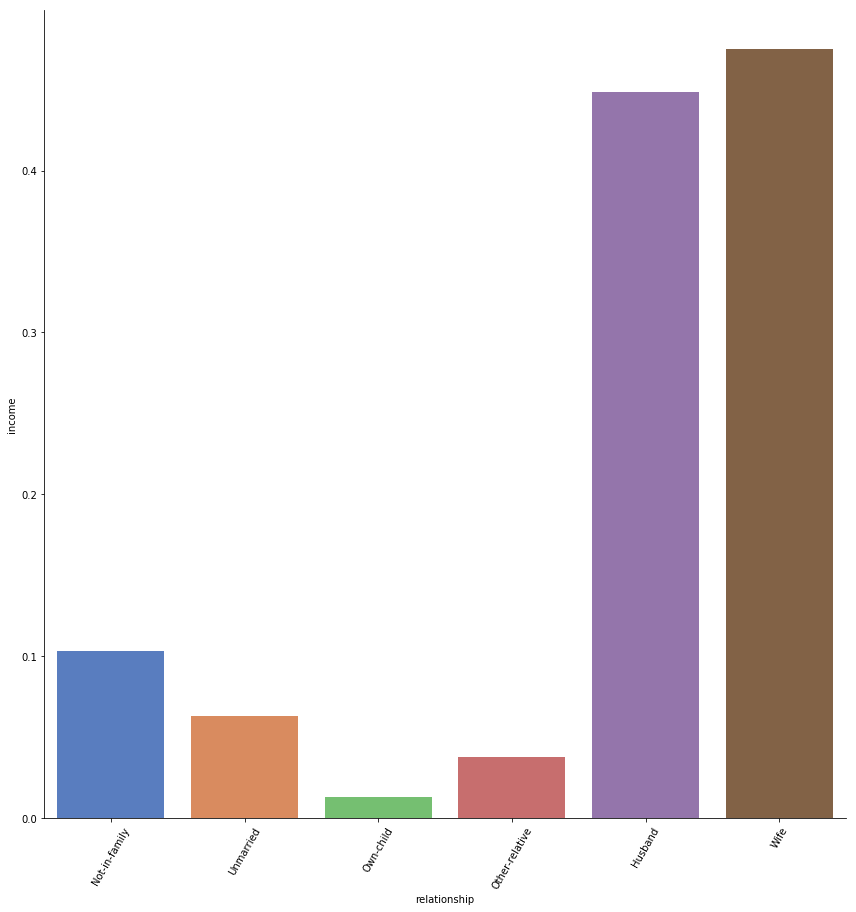

In [23]:
sns.catplot(x="relationship",y="income",data=ad,kind="bar", height = 12, palette = "muted",ci=None)
plt.xticks(rotation=60)
plt.show()

people who are in relationship with wife are earning more when compared to others

# RACE VS INCOME:

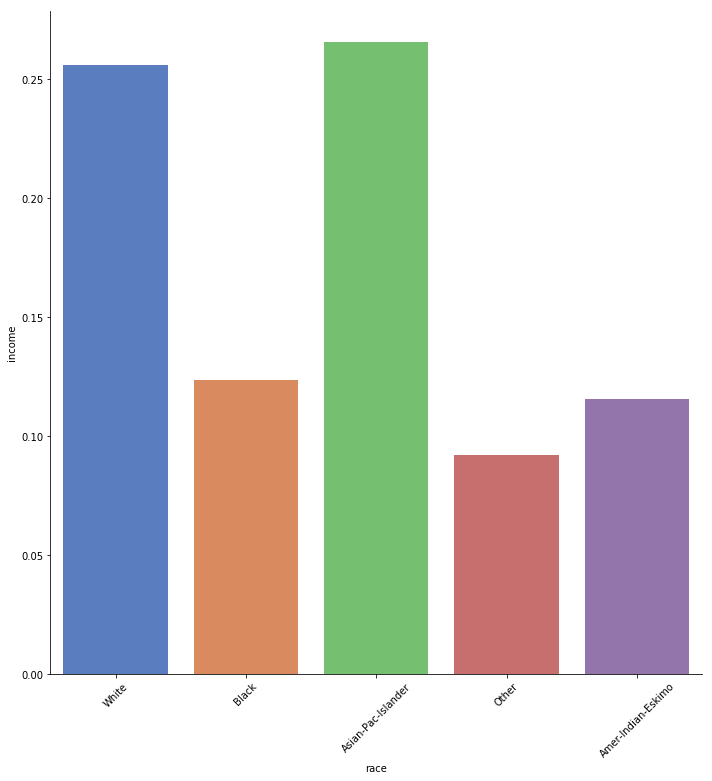

In [24]:
sns.catplot(x="race",y="income",data=ad,kind="bar", height = 10, palette = "muted",ci=None)
plt.xticks(rotation=45);

ASIAN PACIFIC ISLANDER ARE EARNING MORE

# plot of SEX VS INCOME:

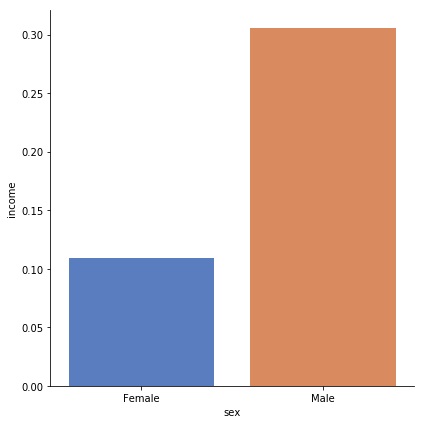

In [25]:
sns.catplot(x="sex",y="income",data=ad,kind="bar", height = 6, palette = "muted",ci=None);

Male are earning more when compared to female

# NATIVECOUNTRY VS INCOME

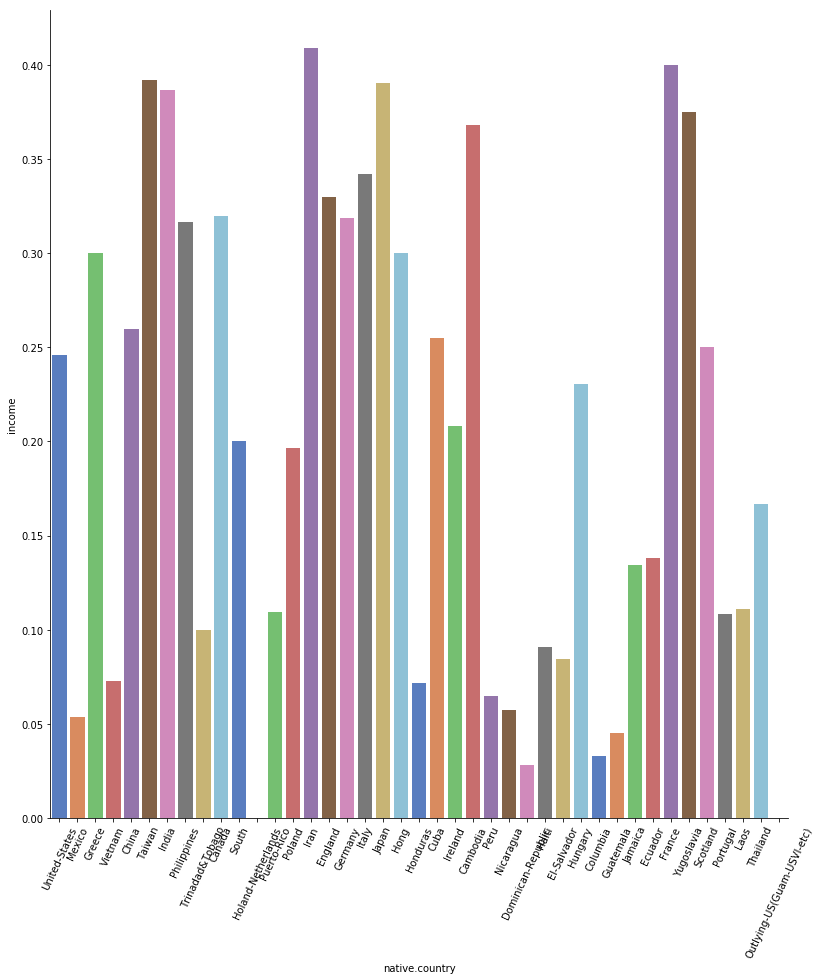

In [26]:
sns.catplot(x="native.country",y="income",data=ad,kind="bar", height = 12, palette = "muted",ci=None)

plt.xticks(rotation=65);

Iran country,France has more income

# Finding Describe of the data:

In [27]:
ad.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


Describe is used to findout the statistical measurements of the data

In [28]:
d=ad.drop(['fnlwgt'],axis=1)

fnlwgt appears to be a highly dispersive. In fact, it is a weight on the Current Population Survey (CPS) files. We will not incorporate fnlwgt in set of predictor variables, we drop the fnlwgt column

# Heatmap:

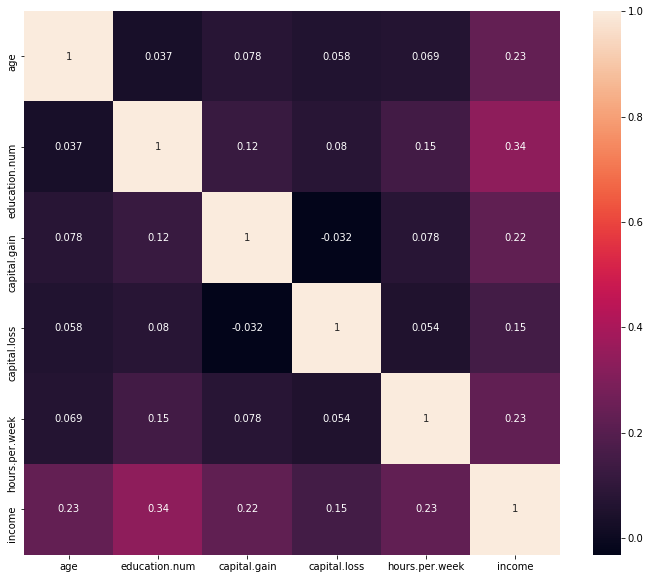

In [29]:
plt.figure(figsize=(12,10))
sns.heatmap(d.corr(),annot=True)
plt.show()

It shows the correlation matrix, above graph shows the education.num, age, hours per week are effecting more

# Pair plot:

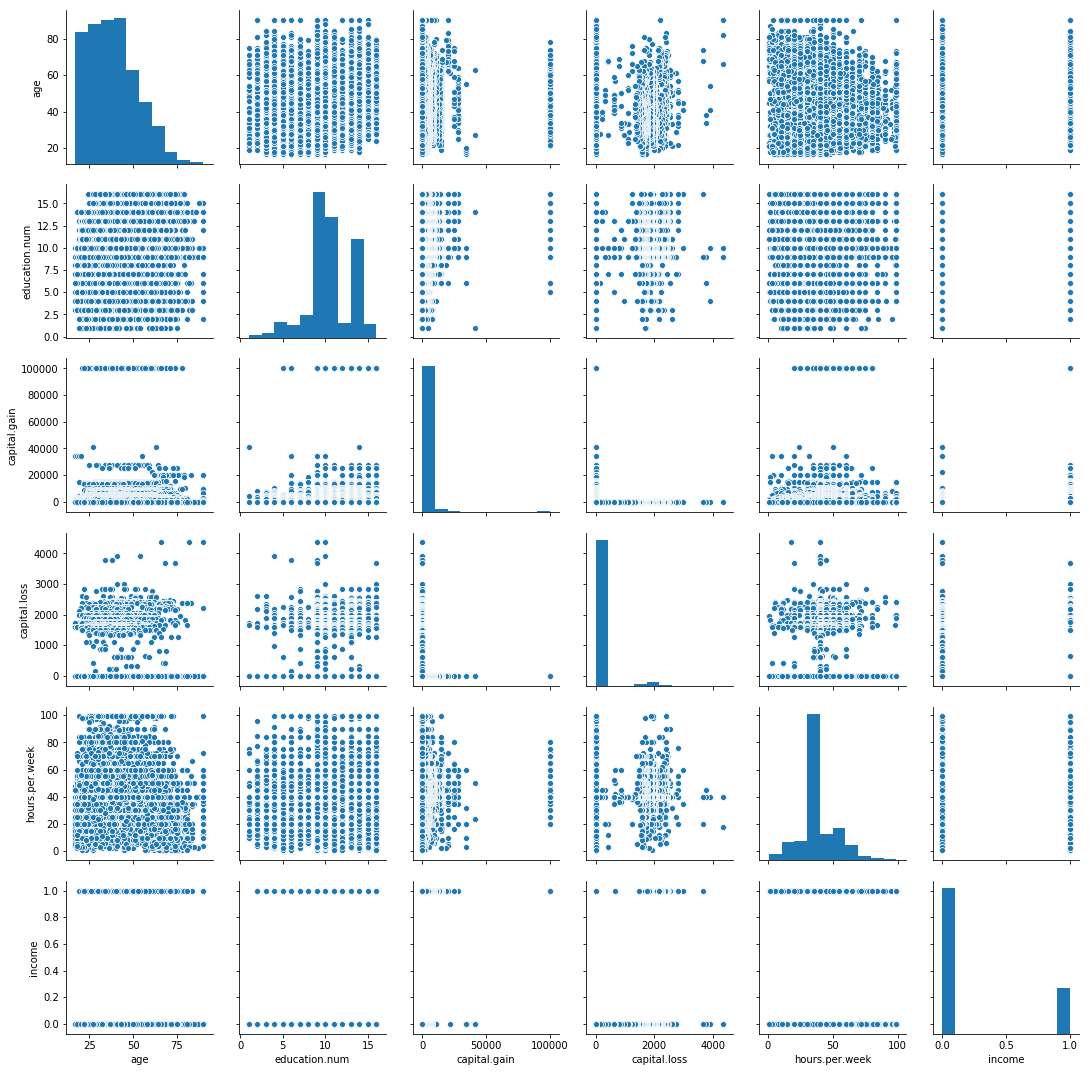

In [30]:
sns.pairplot(d)


A pairs plot allows us to see both distribution of single variables and relationships between two variables .

# BOX PLOT:

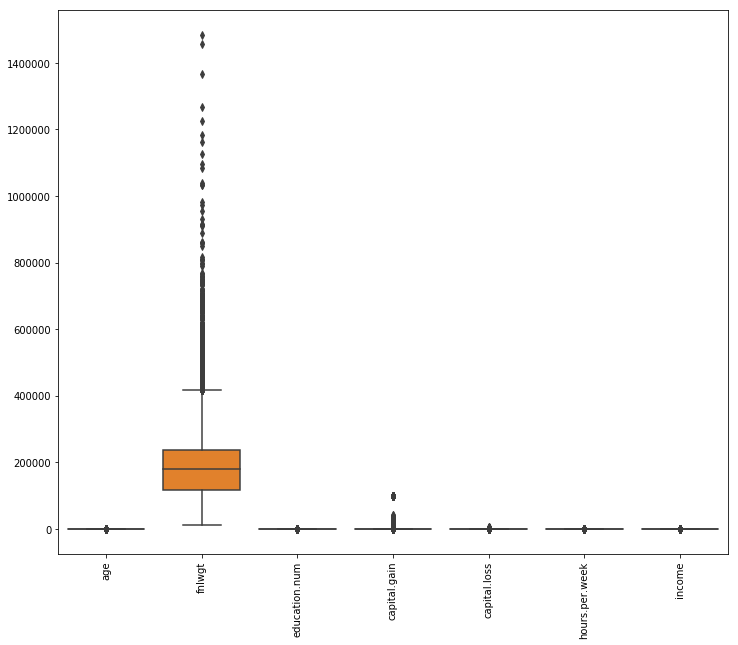

In [31]:
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)
sns.boxplot(data=ad)
plt.show()

Box plot is used to findout the Outliers in your data.